# Conditional Spectrum (CS) Based Record Selection
Created on: 26/08/2021

Updated on: 06/07/2023

Author: Volkan Ozsarac

Affiliation: EUCENTRE, European Centre for Training and Research in Earthquake Engineering

PhD, Seismic Risk Specialist, Structural Engineer

email:  ozsarac.volkan@eucentre.it

## Package installation on Google Colaboratory

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')
# Change directory to the location of notebook
%cd /content/drive/My Drive/Colab Notebooks/EzGM/notebooks
# Install EzGM
!pip install --upgrade pip
!pip install git+https://github.com/volkanozsarac/EzGM.git

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/EzGM/notebooks
  Cloning https://github.com/volkanozsarac/EzGM.git to /tmp/pip-req-build-7bjjp9e3
  Running command git clone --filter=blob:none --quiet https://github.com/volkanozsarac/EzGM.git /tmp/pip-req-build-7bjjp9e3
  Resolved https://github.com/volkanozsarac/EzGM.git to commit c33ab0325a3bea1535681f8b52710384403fbd1d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 69.9 MB/s eta 

In [ ]:
from EzGM.selection import ConditionalSpectrum
from EzGM.utility import check_gmpe_attributes, run_time
from time import time
import numpy as np

## A) Example using NGA_W2 database, IM = Sa(T*), and single scenario

In [ ]:
# Acquire the run start time
start_time = time()

### 1) Initialize the conditional_spectrum object for record selection, check which parameters are required for the gmpe you are using.

In [ ]:
# Initialize the object
cs = ConditionalSpectrum(database='NGA_W2', output_directory='Outputs_A')

# Check attributes of ground motion prediction equation AkkarEtAlRjb2014
check_gmpe_attributes(gmpe='AkkarEtAlRjb2014')

GMPE name: AkkarEtAlRjb2014
Supported tectonic region: ACTIVE_SHALLOW_CRUST
Supported standard deviation: Inter event, Intra event, Total
Supported intensity measure: PGV, SA, PGA
Supported intensity measure component: GEOMETRIC_MEAN
Supported SA period range: 0.01 - 4.0
Required distance parameters: rjb
Required rupture parameters: rake, mag
Required site parameters: vs30


### 2) Create target spectrum

Target spectrum is created.


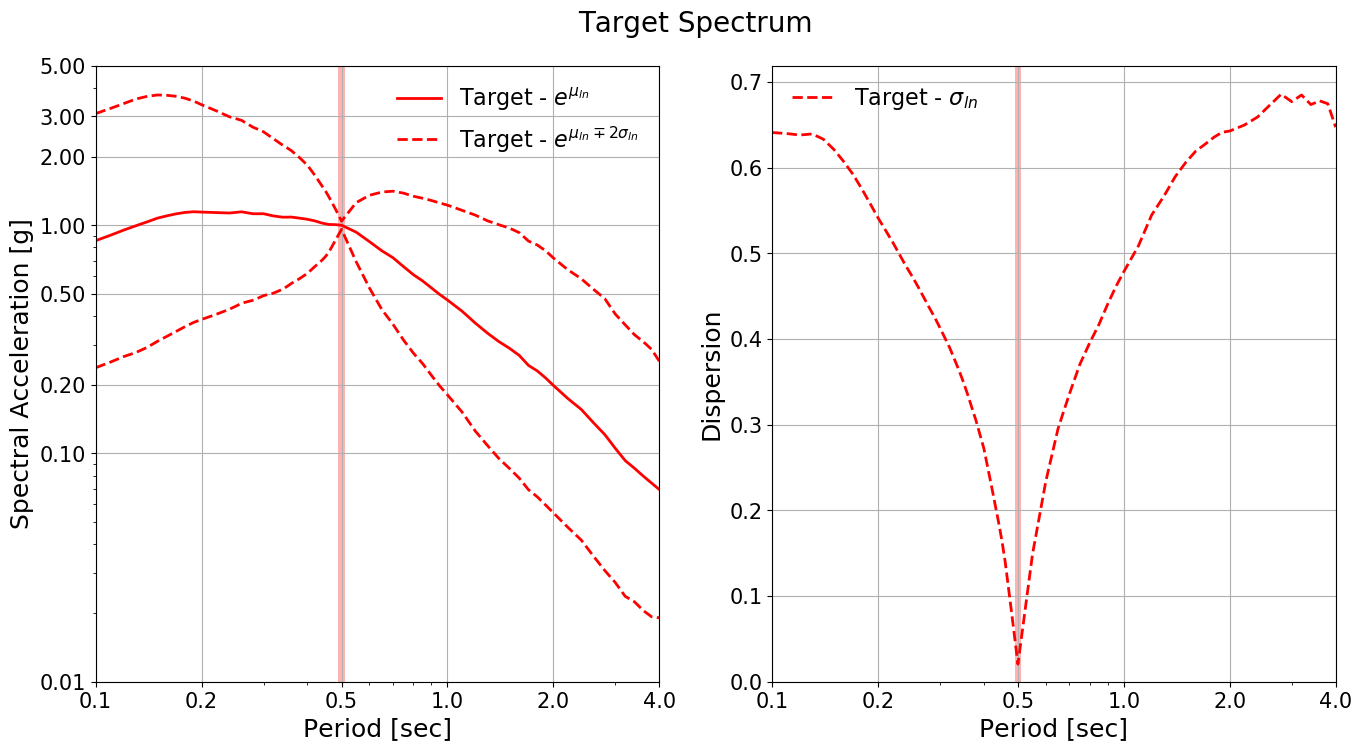

In [ ]:
# Note that intensity measure component is GEOMETRIC_MEAN:Geometric mean of two horizontal components
cs.create(Tstar=0.5, gmpe='AkkarEtAlRjb2014', num_components=2, spectrum_definition='GeoMean',
          site_param={'vs30': 500}, rup_param={'rake': [0.0], 'mag': [7.5]},
          dist_param={'rjb': [10]}, hz_cont=None, period_range=[0.1, 4.0],
          im_Tstar=1.0, epsilon=None, use_variance=1, correlation_model='akkar')

# Target spectrum can be plotted at this stage
cs.plot(target=1, simulations=0, records=0, save=1, show=1)

### 3) Select the ground motions

Ground motion selection is finished.
For T ∈ [0.10 - 4.00]
Max error in median = 1.70 %
Max error in standard deviation = 5.84 %
The errors are within the target 10 percent %


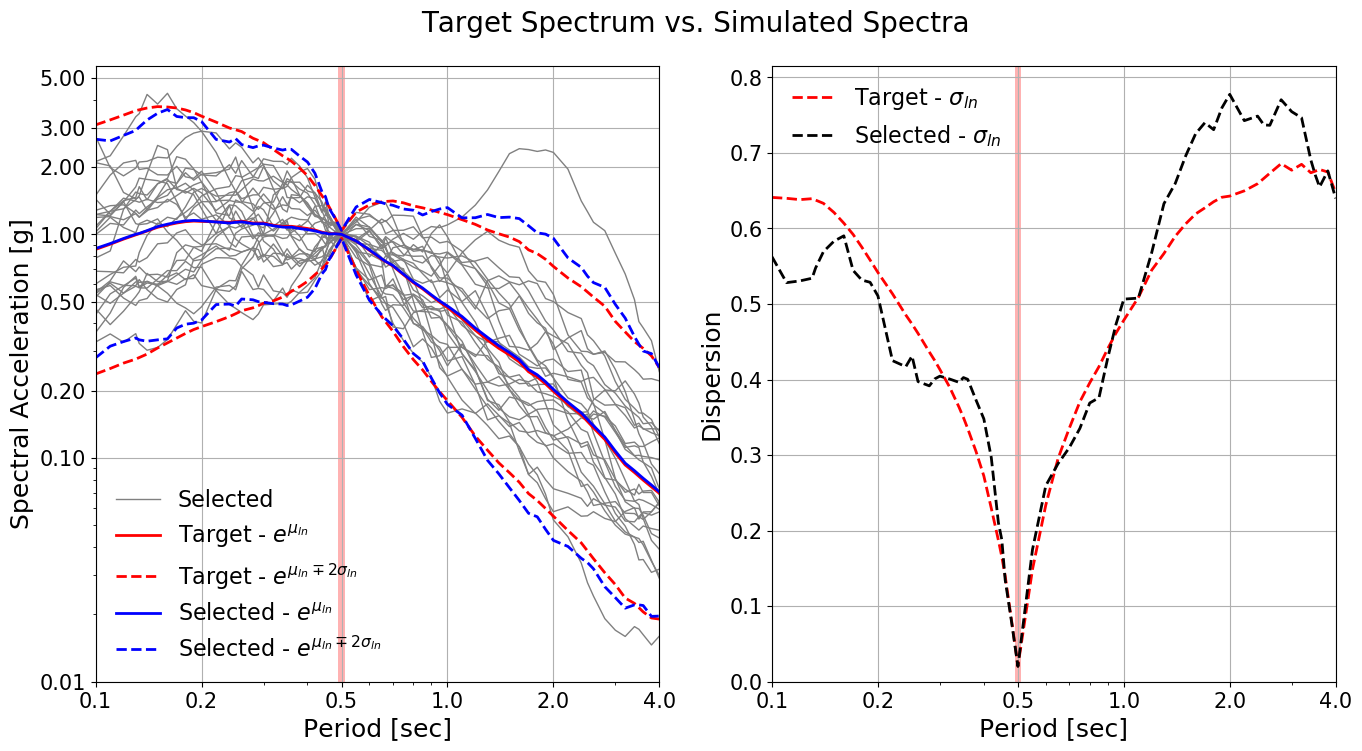

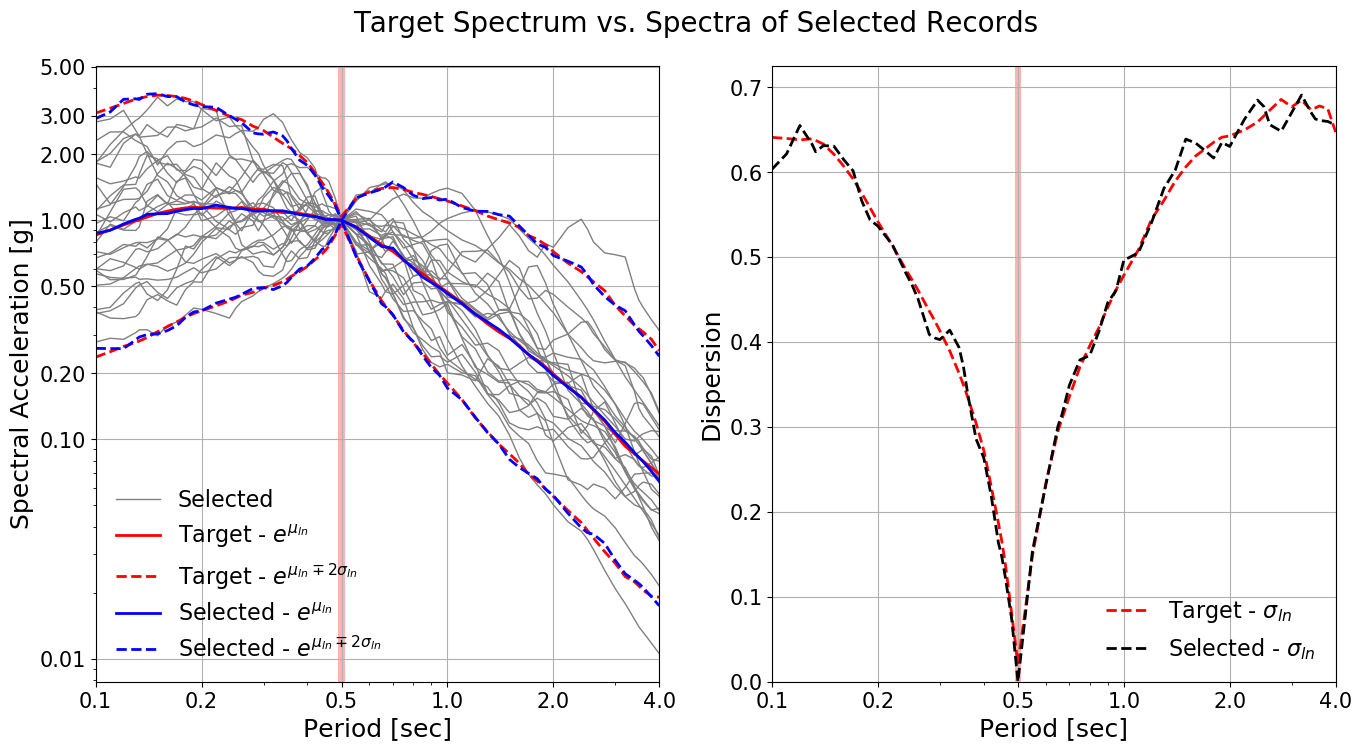

In [ ]:
cs.select(num_records=25, is_scaled=1, max_scale_factor=4, num_simulations=20,
          error_weights=[1, 2, 0.3], seed_value=0, num_greedy_loops=2, penalty=1, tolerance=10,
          mag_limits=[5.5, 8], vs30_limits=[360, 760], rjb_limits=[0, 50], mech_limits=None)

# The simulated spectra and spectra of selected records can be plotted at this stage
cs.plot(target=0, simulations=1, records=1, save=1, show=1)

### 4) First the records can be downloaded via download method. If database='NGA_W2' the preferred browser to execute the method should be provided. In this case records will be retrieved from [http://ngawest2.berkeley.edu/]. If you already have record database elsewhere you can ignore and comment this part

In [ ]:
# You should enter correct credentials to download the records
cs.download(username='example_username@email.com', password='example_password123456', browser='firefox')


Started executing download method to retrieve selected records from https://ngawest2.berkeley.edu
Getting the webdriver to use...


1632kb [00:01, 1540.32kb/s]                                                                                            


Webdriver is obtained successfully.
Signing in with credentials...
Signed in successfully.
Listing the Records...
Search was successfully created. Please allow time to render the graphics.
You are downloading the UNSCALED, PROCESSED, AS-RECORDED (unrotated) displacement, velocity and acceleration trace files. The scale factors determined using the on-line tool are given in the csv file accompanying the trace files! The users of the PEER-NGA databases, flatfiles, models and reports are requested to acknowledge the Pacific Earthquake Engineering Research Center (PEER) in their work and publications.
Please allow a few seconds of apparent inactivity for the download to complete. The wait time depends on the number of records being downloaded and the network speed. Wait until your browser indicates that it has completed the download!
Finishing in 4 ...
Finishing in 3 ...
Finishing in 2 ...
Finishing in 1 ...
Finishing in 0 ...
Downloaded files are located in
C:\Users\Volkan\Documents\GitHu

### 5) If you have records already inside zip_parent_path\database.zip\database or downloaded records, write whatever you want, the object itself, selected and scaled time histories

In [ ]:
cs.write(object=1, records=1, zip_parent_path='')

Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\Outputs_A


In [ ]:
# Calculate the total time passed
run_time(start_time)

Run time: 0 hours: 1 minutes: 13.23 seconds


## B) Example using ESM_2018 database, IM = Sa(T*), and single scenario

In [ ]:
# Acquire the run start time
start_time = time()

### 1) Initialize the conditional_spectrum object for record selection, check which parameters are required for the gmpe you are using.

In [ ]:
cs = ConditionalSpectrum(database='ESM_2018', output_directory='Outputs_B')

### 2) Create target spectrum

Target spectrum is created.


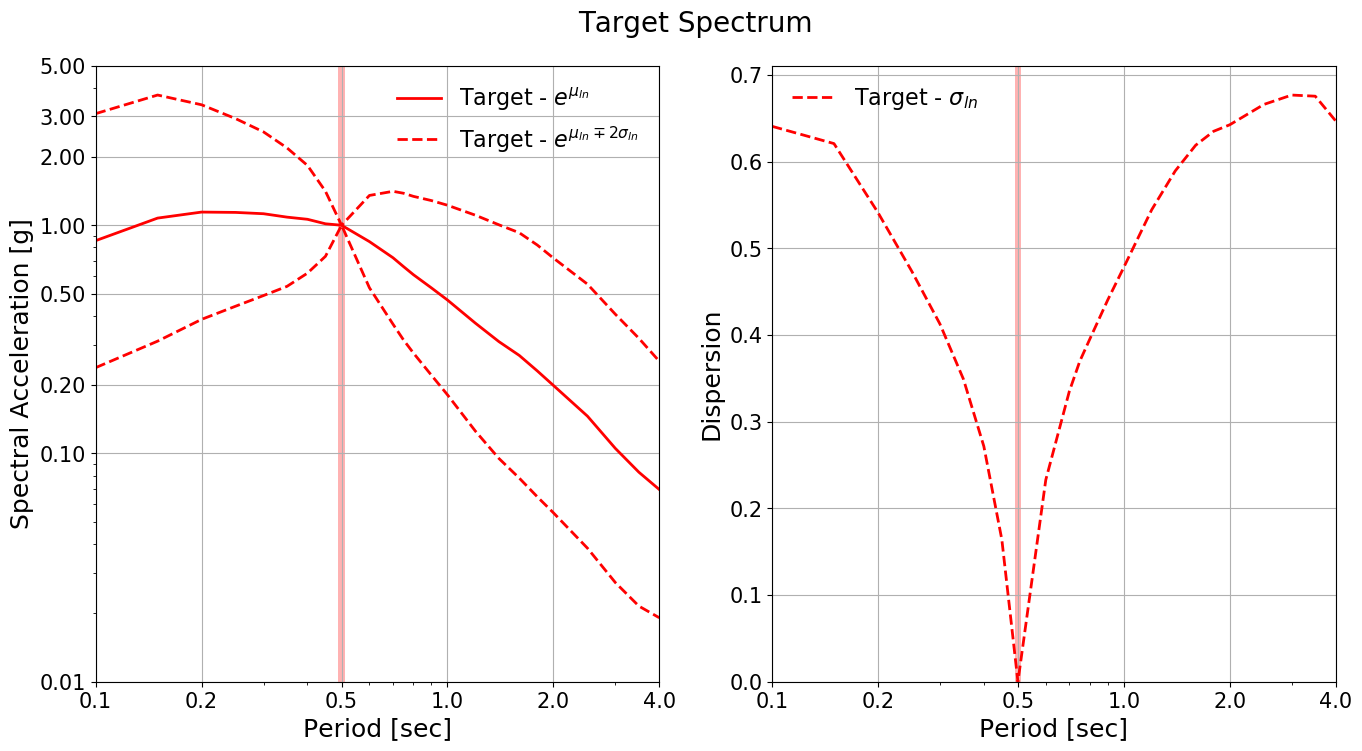

In [ ]:
# Note that intensity measure component is GEOMETRIC_MEAN:Geometric mean of two horizontal components
cs.create(Tstar=0.5, gmpe='AkkarEtAlRjb2014', num_components=2, spectrum_definition='GeoMean',
          site_param={'vs30': 500}, rup_param={'rake': [0.0], 'mag': [7.5]},
          dist_param={'rjb': [10]}, hz_cont=None, period_range=[0.1, 4.0],
          im_Tstar=1.0, epsilon=None, use_variance=1, correlation_model='akkar')

# Target spectrum can be plotted at this stage
cs.plot(target=1, simulations=0, records=0, save=1, show=1)

### 3) Select the ground motions

Ground motion selection is finished.
For T ∈ [0.10 - 4.00]
Max error in median = 0.42 %
Max error in standard deviation = 7.47 %
The errors are within the target 10 percent %


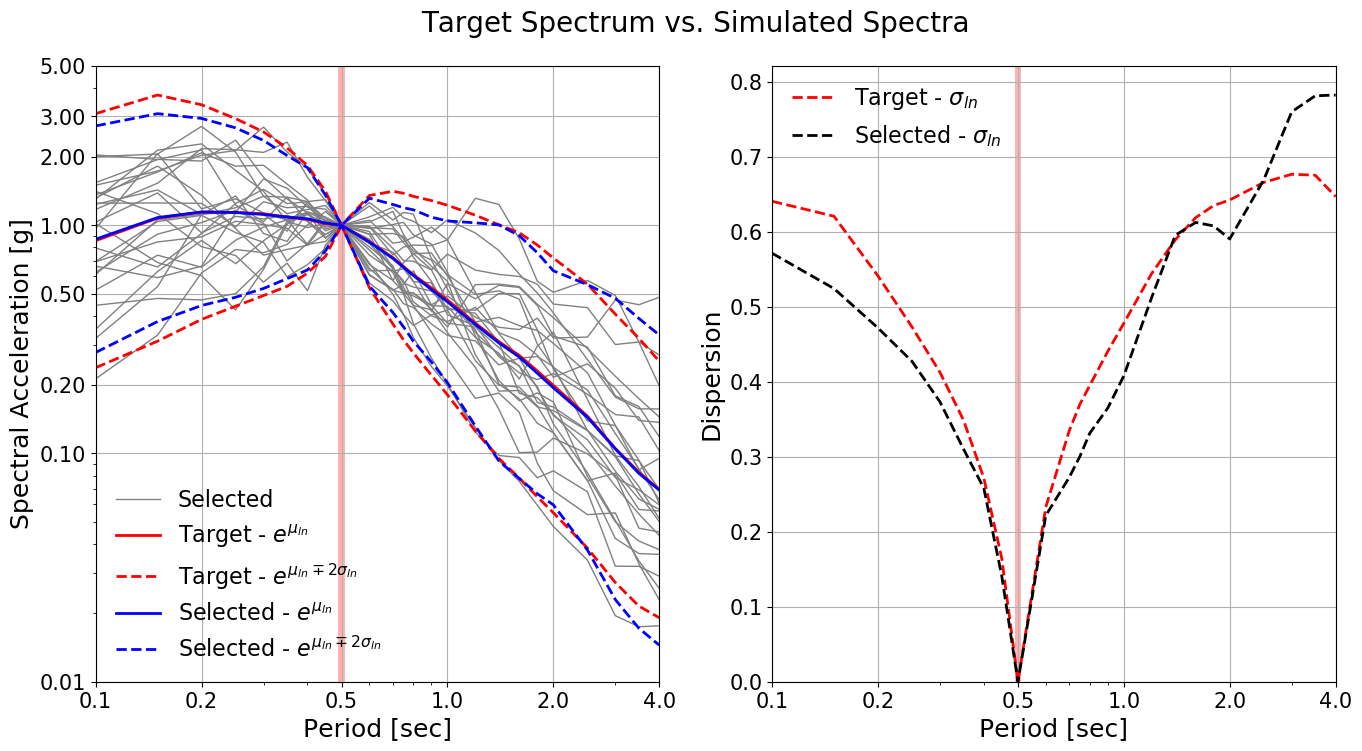

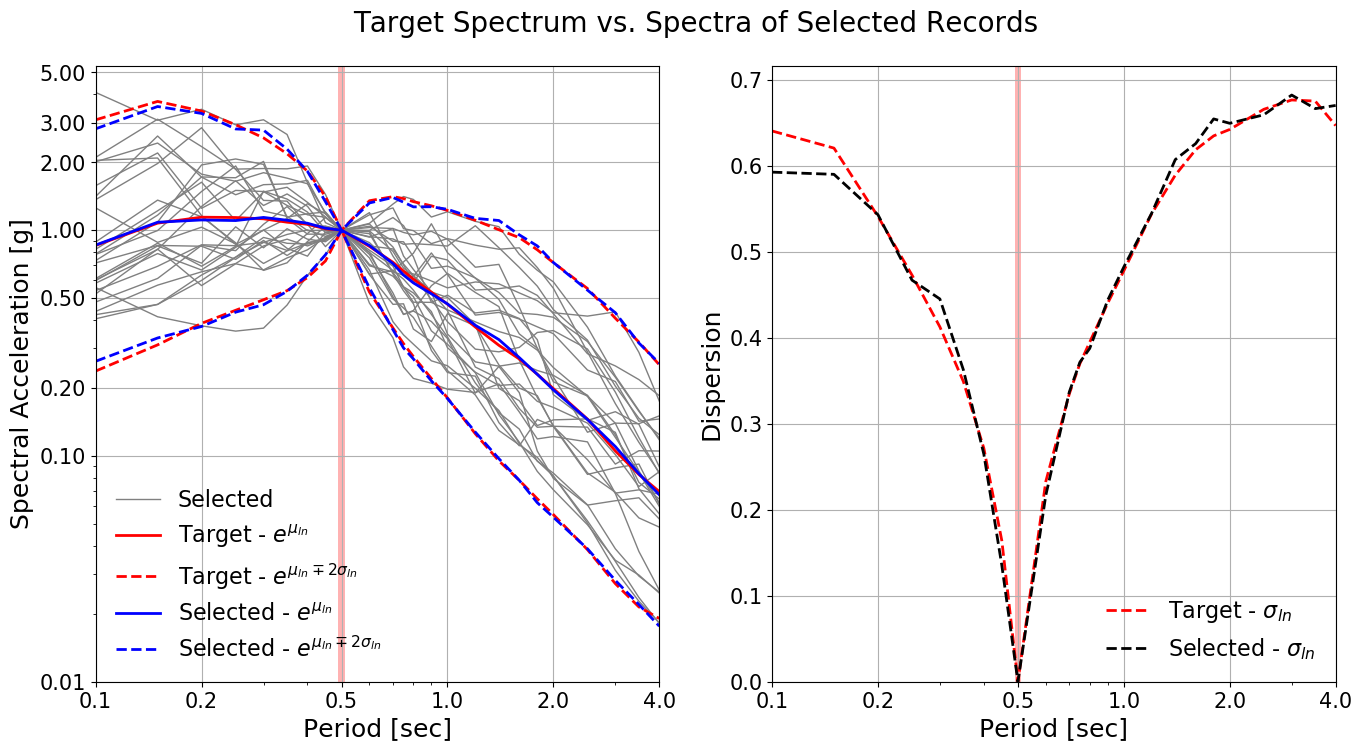

In [ ]:
cs.select(num_records=25, is_scaled=1, max_scale_factor=4, num_simulations=20,
          error_weights=[1, 2, 0.3], seed_value=0, num_greedy_loops=2, penalty=1, tolerance=10,
          mag_limits=None, vs30_limits=None, rjb_limits=None, mech_limits=None)

# The simulated spectra and spectra of selected records can be plotted at this stage
cs.plot(target=0, simulations=1, records=1, save=1, show=1)

### 4) First the records can be downloaded via download method. If database='ESM_2018' either available token path or valid credentials must be provided. Token can be retrieved manually by the user or externally using utility.get_esm_token method. In this case, the token will be retrieved internally for the provided credentials, and the records will be retrieved from [https://esm-db.eu]. If you already have record database elsewhere you can ignore and comment this part

In [ ]:
cs.download(username='example_username@email.com', password='example_password123456', token_path=None)


Started executing download method to retrieve selected records from https://esm-db.eu
Downloaded files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\Outputs_B\unscaled_records_2023_7_6_10_50_59_3_187_0.zip


### 5) If you have records already inside zip_parent_path\database.zip\database or downloaded records, write whatever you want, the object itself, selected and scaled time histories

In [ ]:
cs.write(object=1, records=1, zip_parent_path='')

Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\Outputs_B


In [ ]:
# Calculate the total time passed
run_time(start_time)

Run time: 0 hours: 0 minutes: 50.54 seconds


## C) Example using NGA_W2 database, IM = AvgSa(T*), and two scenarios

In [ ]:
# Acquire the run start time
start_time = time()

### 1) Initialize the conditional_spectrum object for record selection, check which parameters are required for the gmpe you are using.

In [ ]:
# initialize the object
cs = ConditionalSpectrum(database='NGA_W2', output_directory='Outputs_C')

# Check attributes of ground motion prediction equation BooreEtAl2014
check_gmpe_attributes(gmpe='BooreEtAl2014')

GMPE name: BooreEtAl2014
Supported tectonic region: ACTIVE_SHALLOW_CRUST
Supported standard deviation: Inter event, Intra event, Total
Supported intensity measure: PGV, SA, PGA
Supported intensity measure component: RotD50
Supported SA period range: 0.01 - 10.0
Required distance parameters: rjb
Required rupture parameters: rake, mag
Required site parameters: vs30


### 2) Create target spectrum

Target spectrum is created.


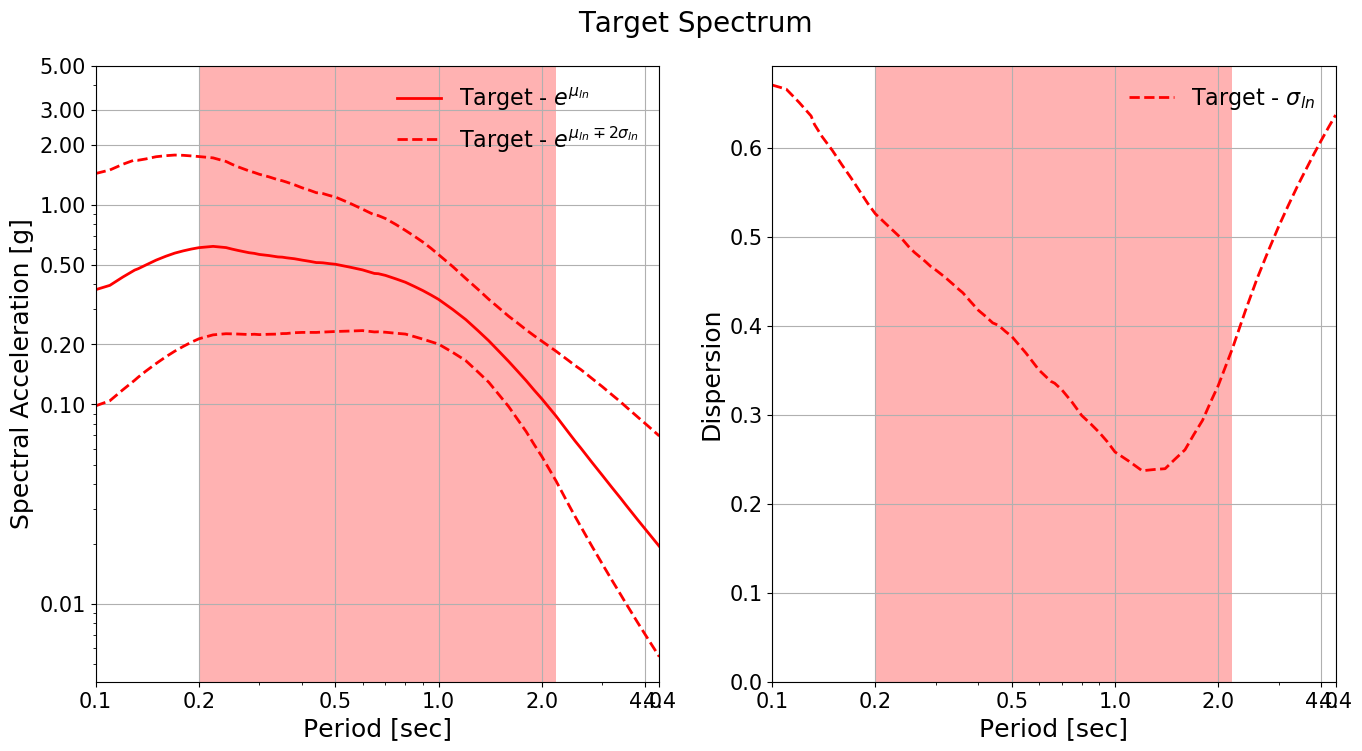

In [ ]:
# Note that intensity measure component is RotD50
cs.create(Tstar=np.arange(0.2, 2.4, 0.2), gmpe='BooreEtAl2014', num_components=2, spectrum_definition='RotD50',
          site_param={'vs30': 620}, rup_param={'rake': [0.0, 0.0], 'mag': [6.5, 6.0]},
          dist_param={'rjb': [20, 30]}, hz_cont=[0.4, 0.6], period_range=[0.1, 4.5],
          im_Tstar=0.25, epsilon=None, use_variance=1, correlation_model='baker_jayaram')

# Target spectrum can be plotted at this stage
cs.plot(target=1, simulations=0, records=0, save=1, show=1)

### 3) Select the ground motions

Ground motion selection is finished.
For T ∈ [0.10 - 4.40]
Max error in median = 7.08 %
Max error in standard deviation = 9.11 %
The errors are within the target 10 percent %


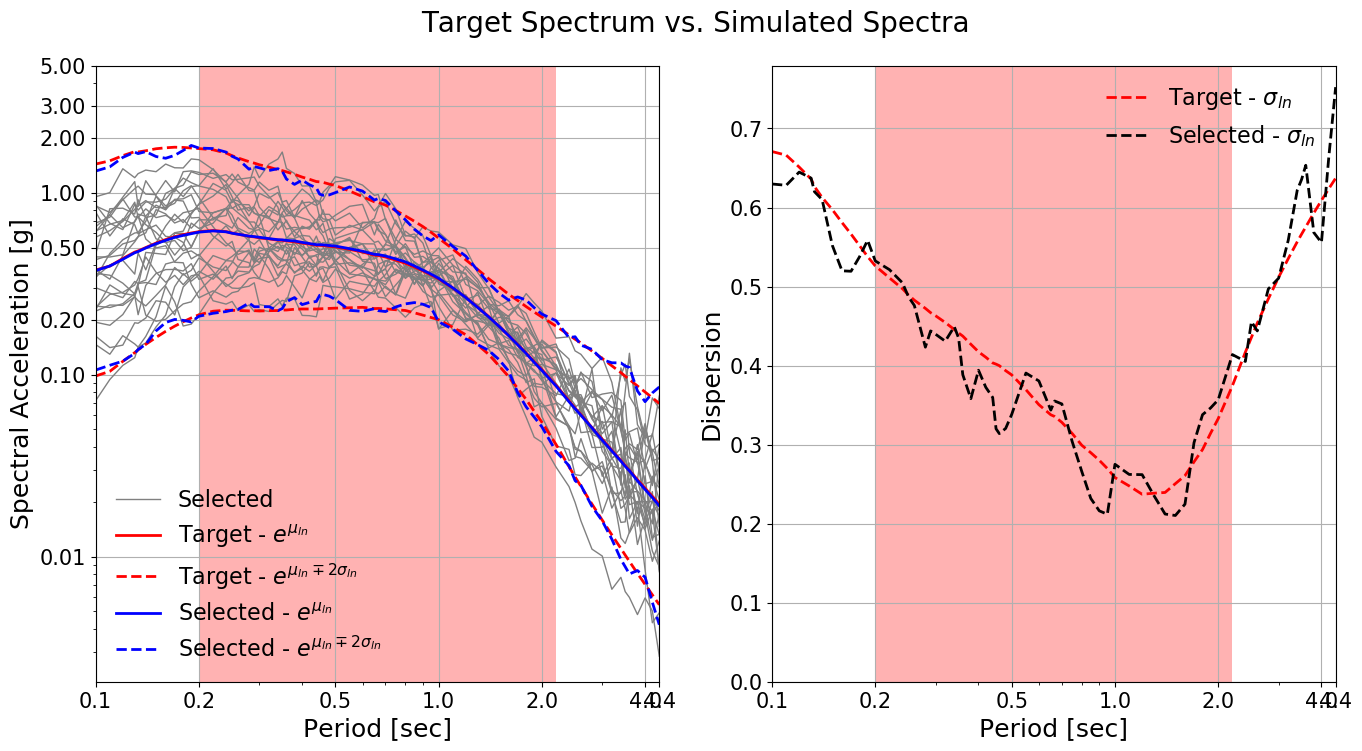

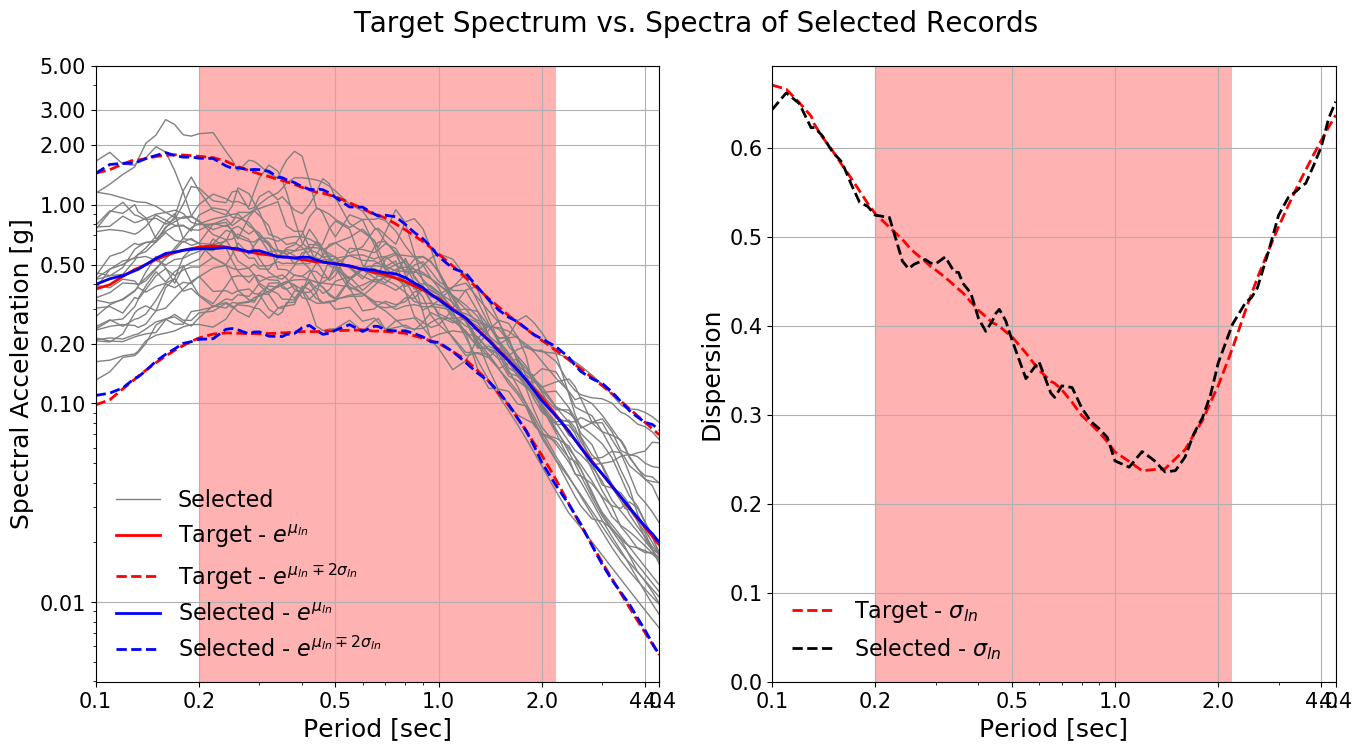

In [ ]:
cs.select(num_records=25, is_scaled=1, max_scale_factor=4,
          mag_limits=[5.5, 8], vs30_limits=[360, 760], rjb_limits=[0, 50], mech_limits=None, num_simulations=20,
          error_weights=[1, 2, 0.3], seed_value=0, num_greedy_loops=2, penalty=1, tolerance=10)

# The simulated spectra and spectra of selected records can be plotted at this stage
cs.plot(target=0, simulations=1, records=1, save=1, show=1)

### 4) First the records can be downloaded via download method. If database='NGA_W2' the preferred browser to execute the method should be provided. In this case records will be retrieved from [http://ngawest2.berkeley.edu/]. If you already have record database elsewhere you can ignore and comment this part

In [ ]:
# You should enter correct credentials to download the records
cs.download(username='example_username@email.com', password='example_password123456', browser='chrome')


Started executing download method to retrieve selected records from https://ngawest2.berkeley.edu
Getting the webdriver to use...


6449kb [00:02, 2161.77kb/s]                                                                                            


Webdriver is obtained successfully.
Signing in with credentials...
Signed in successfully.
Listing the Records...
Search was successfully created. Please allow time to render the graphics.
You are downloading the UNSCALED, PROCESSED, AS-RECORDED (unrotated) displacement, velocity and acceleration trace files. The scale factors determined using the on-line tool are given in the csv file accompanying the trace files! The users of the PEER-NGA databases, flatfiles, models and reports are requested to acknowledge the Pacific Earthquake Engineering Research Center (PEER) in their work and publications.
Please allow a few seconds of apparent inactivity for the download to complete. The wait time depends on the number of records being downloaded and the network speed. Wait until your browser indicates that it has completed the download!
Finishing in 4 ...
Finishing in 3 ...
Finishing in 2 ...
Finishing in 1 ...
Finishing in 0 ...
Downloaded files are located in
C:\Users\Volkan\Documents\GitHu

### 5) If you have records already inside zip_parent_path\database.zip\database or downloaded records, write whatever you want, the object itself, selected and scaled time histories

In [ ]:
cs.write(object=1, records=1, zip_parent_path='')

Finished writing process, the files are located in
C:\Users\Volkan\Documents\GitHub\EzGM\Examples\binder\Outputs_C


In [ ]:
# Calculate the total time passed
run_time(start_time)

Run time: 0 hours: 1 minutes: 13.05 seconds
